<a href="https://colab.research.google.com/github/muthonioprah/knn-naive_bayes/blob/main/Naive__Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Spam Prediction**

Email spam, also referred to as junk email or simply spam, is unsolicited messages sent in bulk by email. Spam is ubiquitous, unavoidable, and repetitive.
Spam emails often have malicious intent and therefore you should be aware of the potential risks. Some of the risks to be aware of are:


Spyware

Phishing

Ransomware


*source: Wikipedia* 


## **Research Question:**

Create a model that classifies whether an email is spam or not


## **Metric for success:**


A model with an accuracy level greater than 85%

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Spambase

In [22]:
# Start by importing the basic relevant libraries
import pandas as pd
import numpy as np

In [23]:
#names from https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/
file_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']

In [24]:
#previewing the dataset
spam = pd.read_csv('/content/spambase.data', names = file_names)
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [25]:
#checking the changes made
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [26]:
#dataset info
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [27]:
#dataset descriptive analysis
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [28]:
#dataset rows and columns
spam.shape

(4601, 58)

In [29]:
#checking for datatypes
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [30]:
# Check for duplicate values 
spam.duplicated().sum()

391

In [31]:
#checking total null values
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

This dataset has zero null values

# **Cleaning**

In [32]:
#Dropping duplicate values
spam.drop_duplicates(keep= 'first', inplace=True)

In [33]:
#checking for changes
spam.duplicated().sum()

0

All duplicates have been dealt with

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

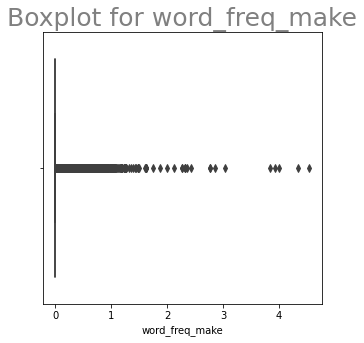

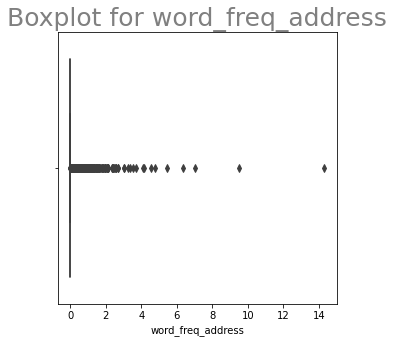

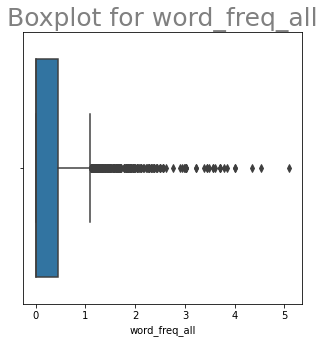

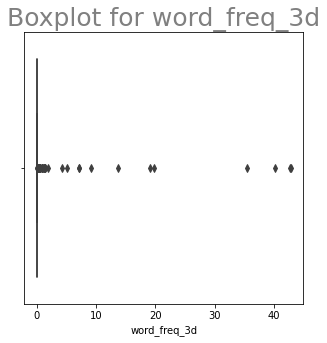

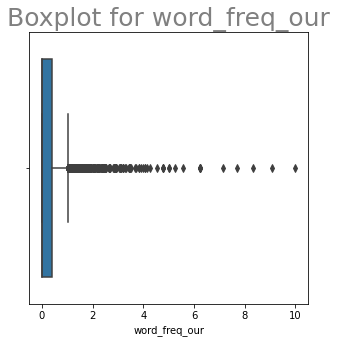

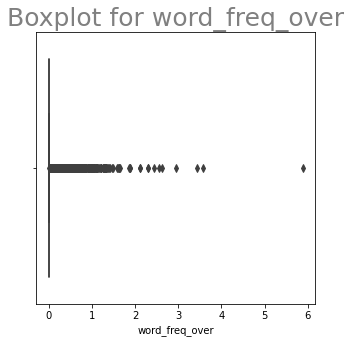

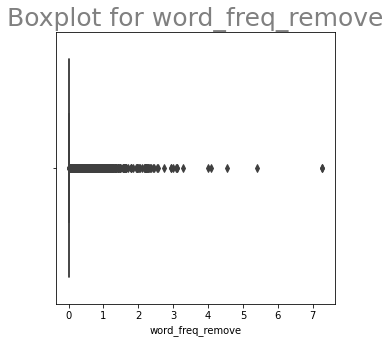

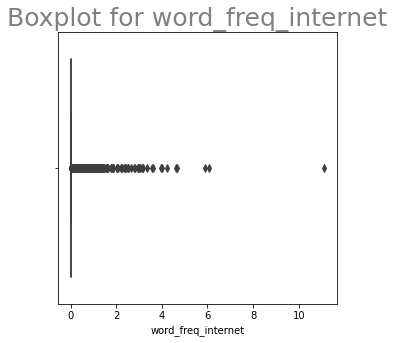

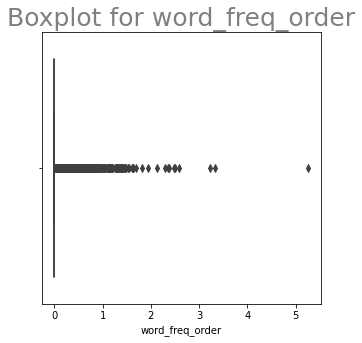

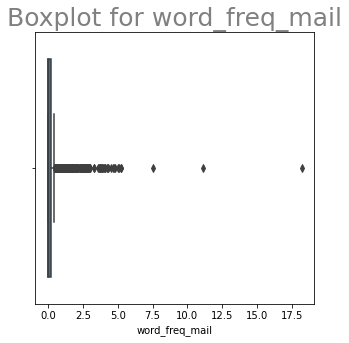

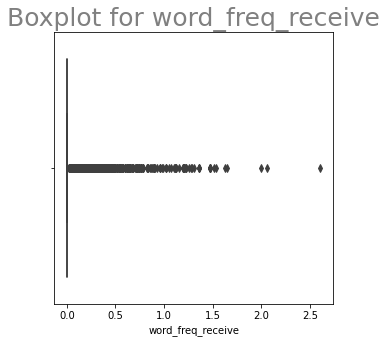

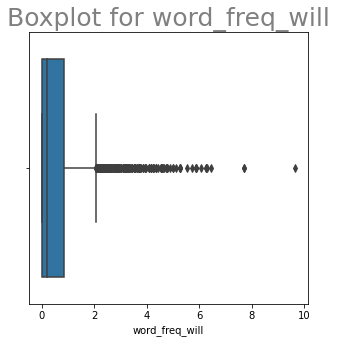

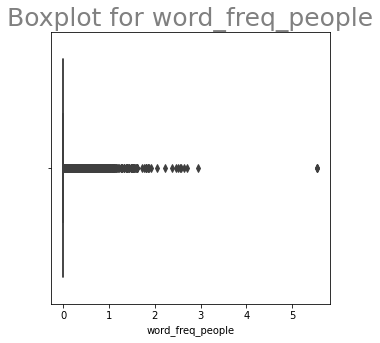

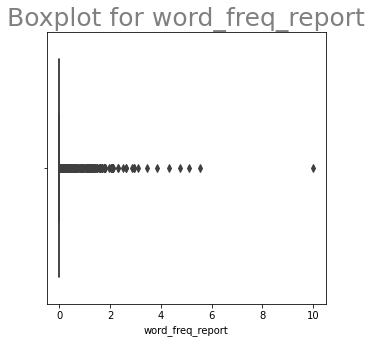

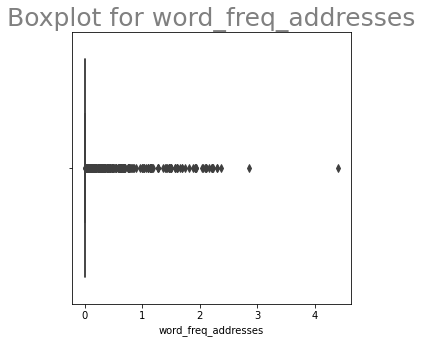

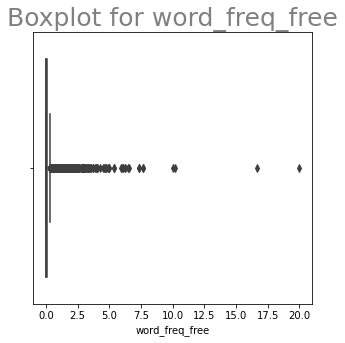

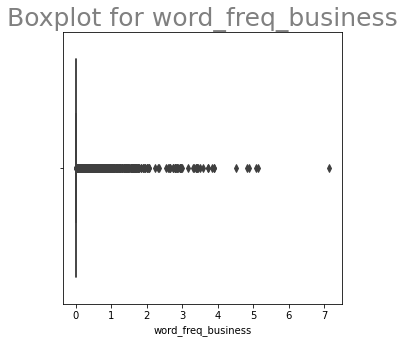

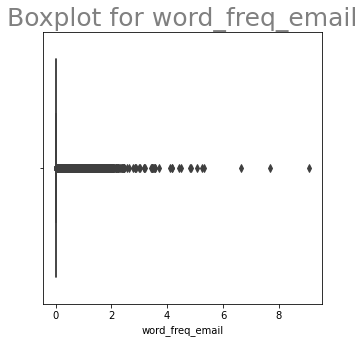

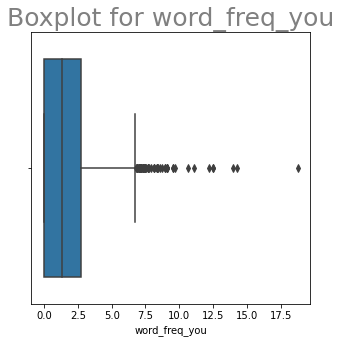

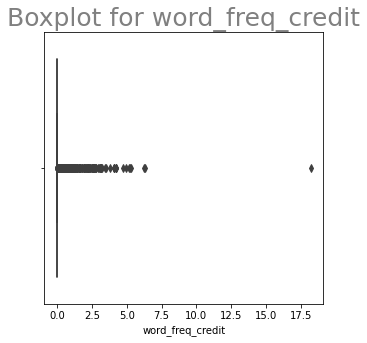

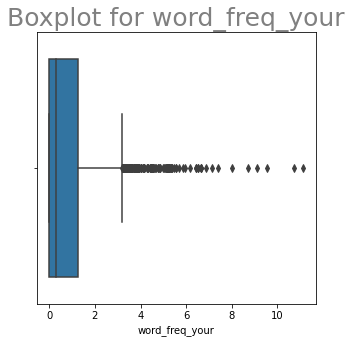

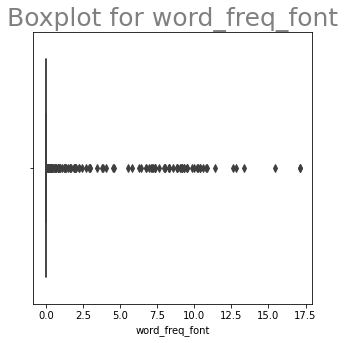

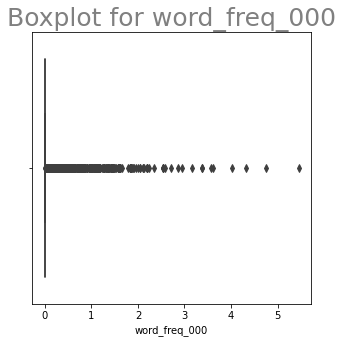

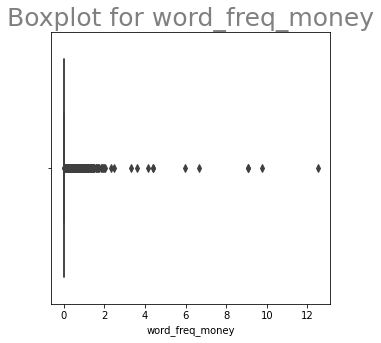

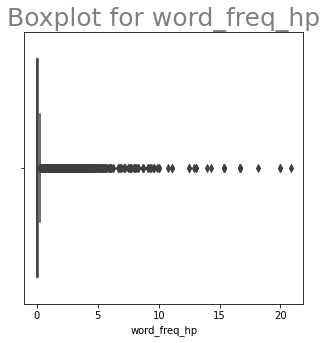

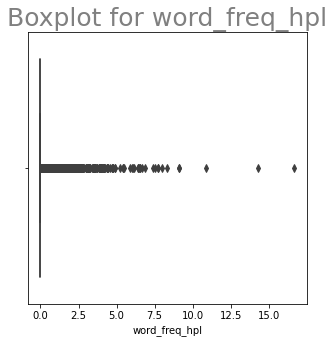

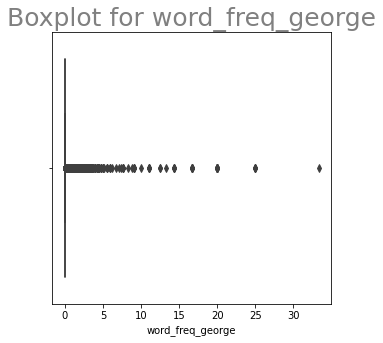

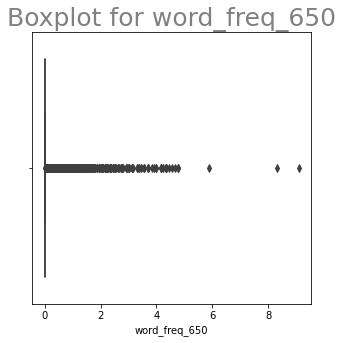

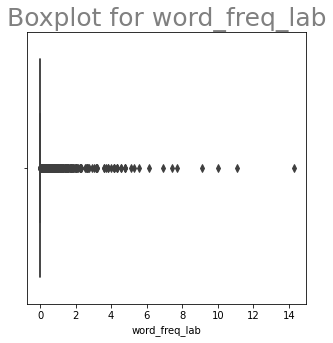

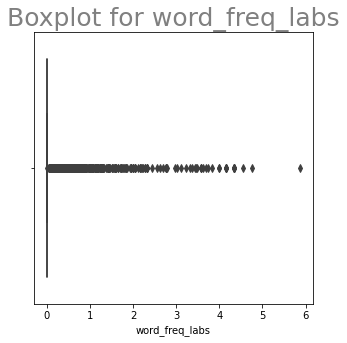

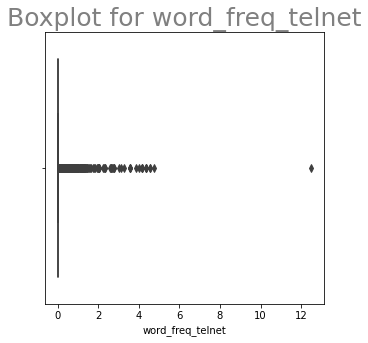

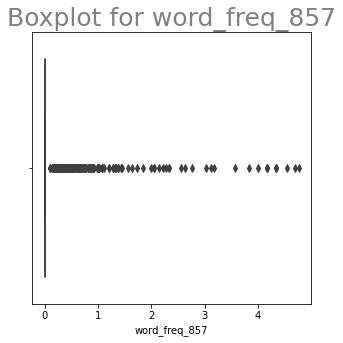

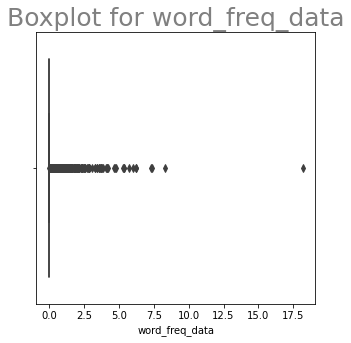

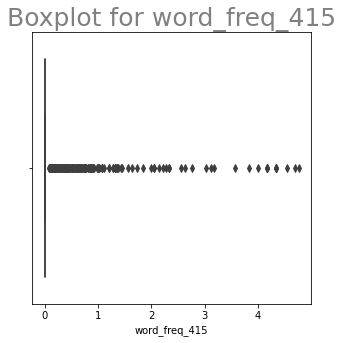

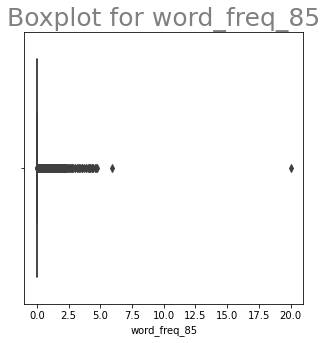

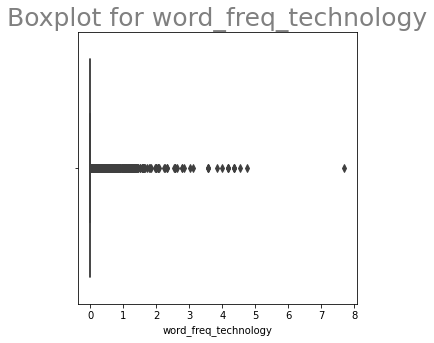

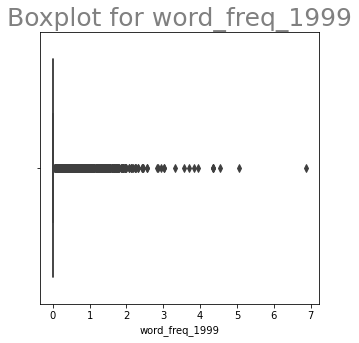

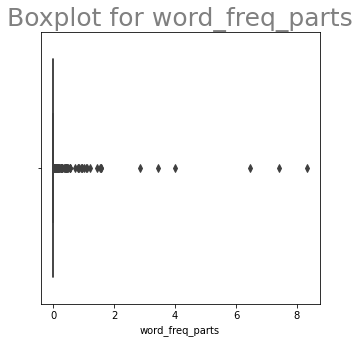

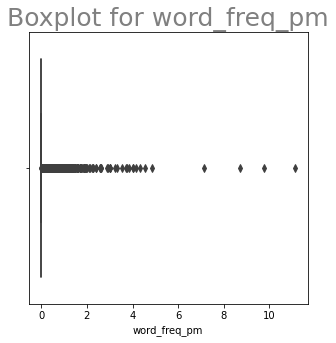

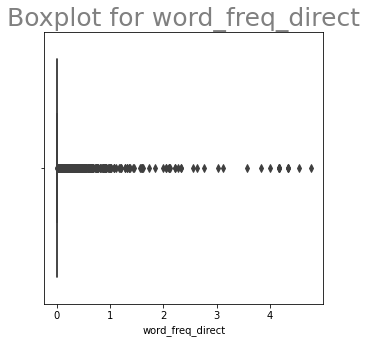

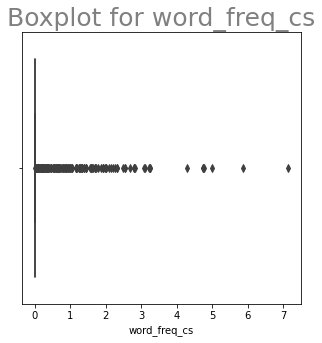

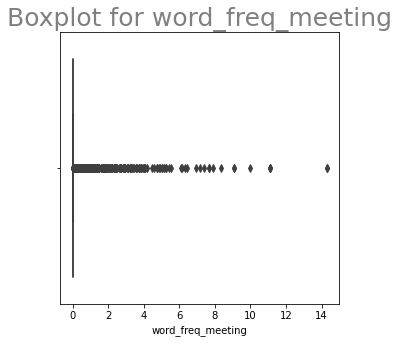

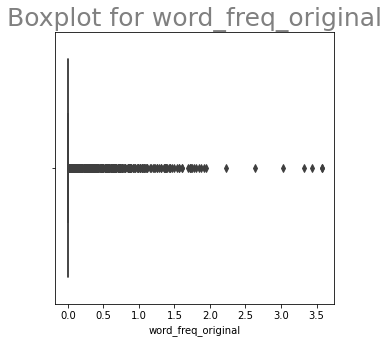

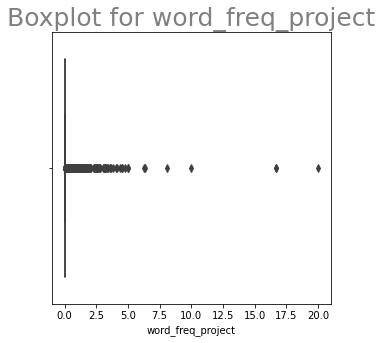

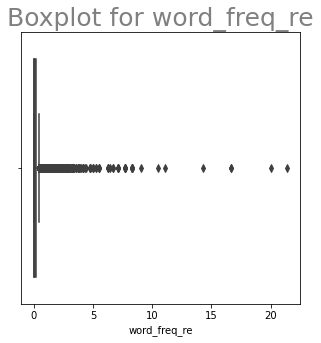

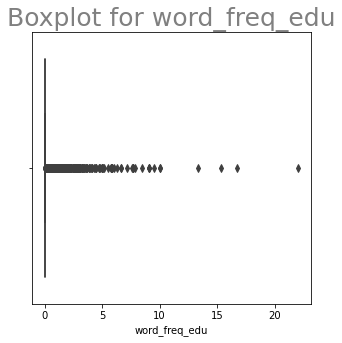

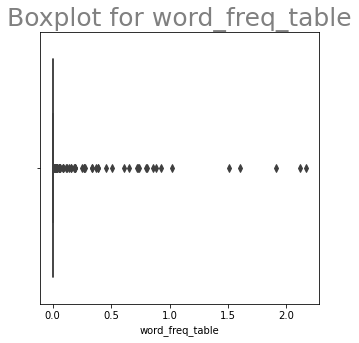

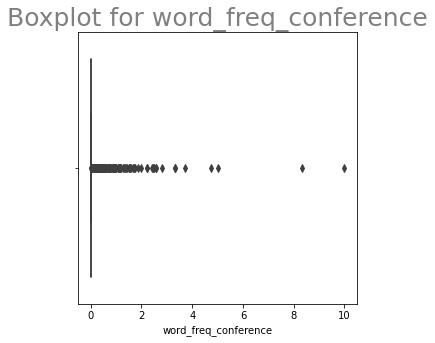

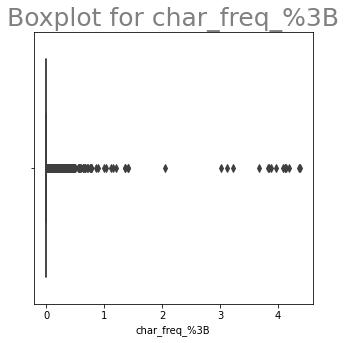

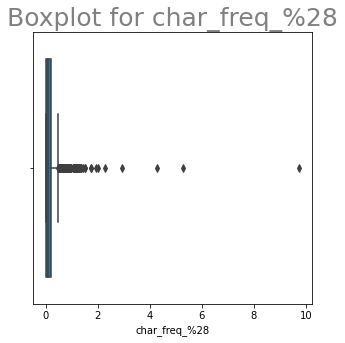

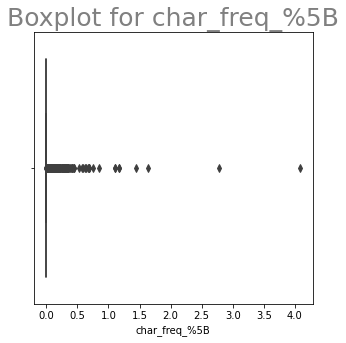

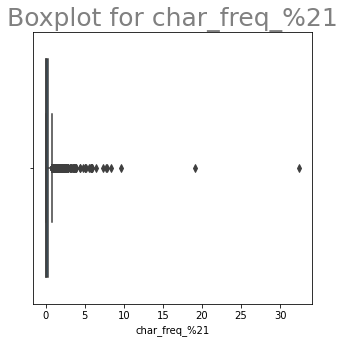

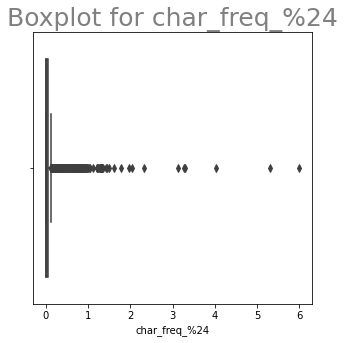

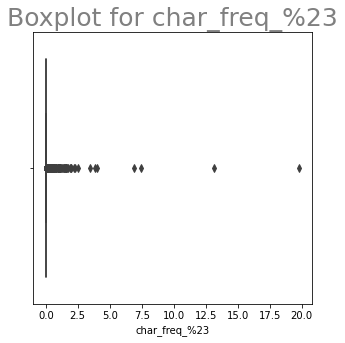

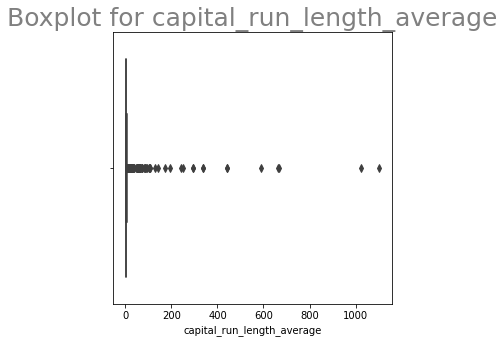

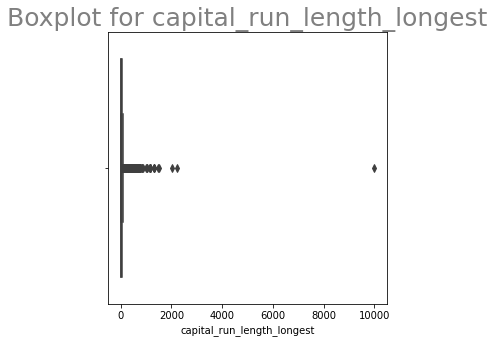

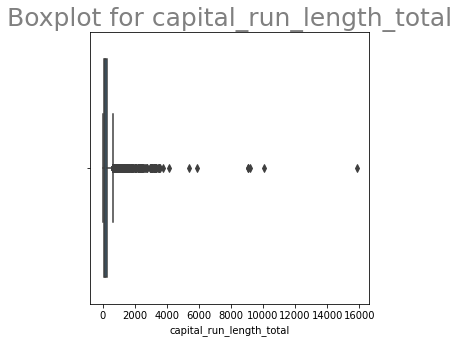

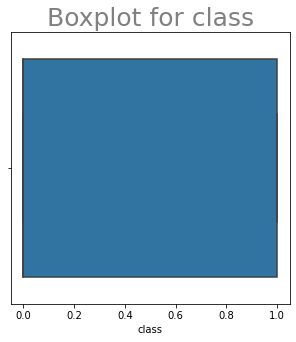

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
#checking for outliers
for i in file_names:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(spam[i])
    plt.title('Boxplot for ' + i, size = 25, color = 'grey')
            
plt.show()

# **Exploratory Data Analysis**

## **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

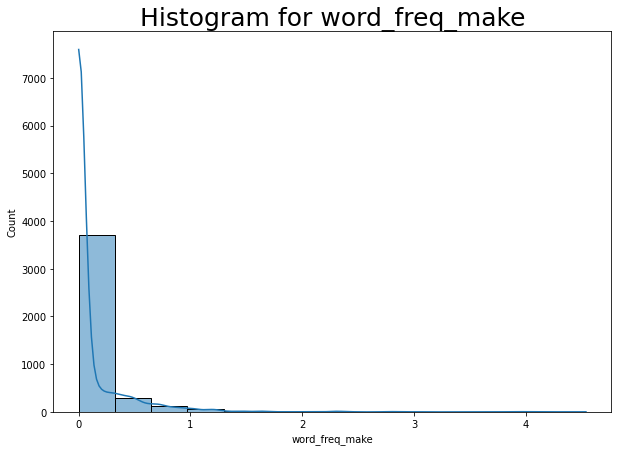

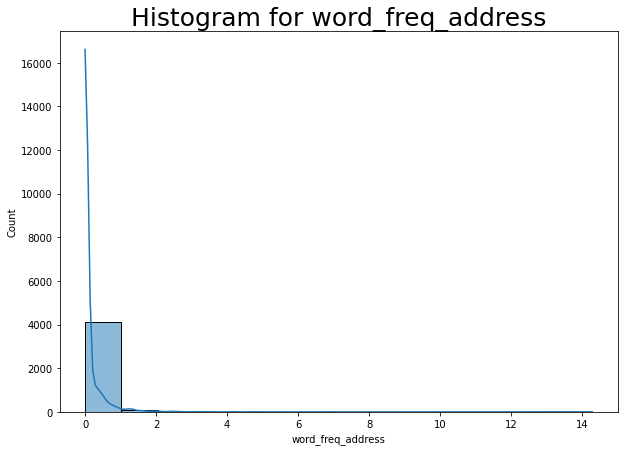

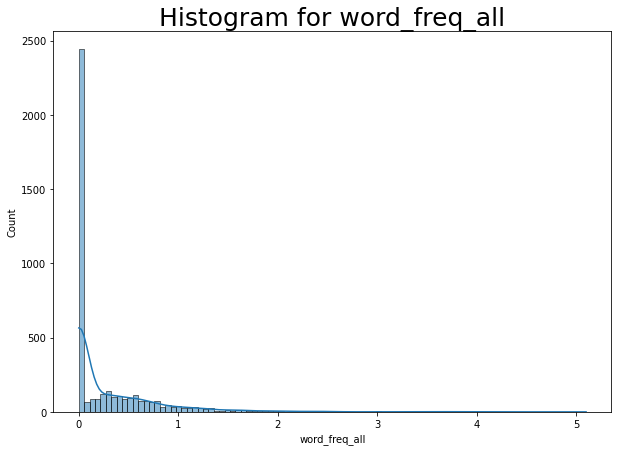

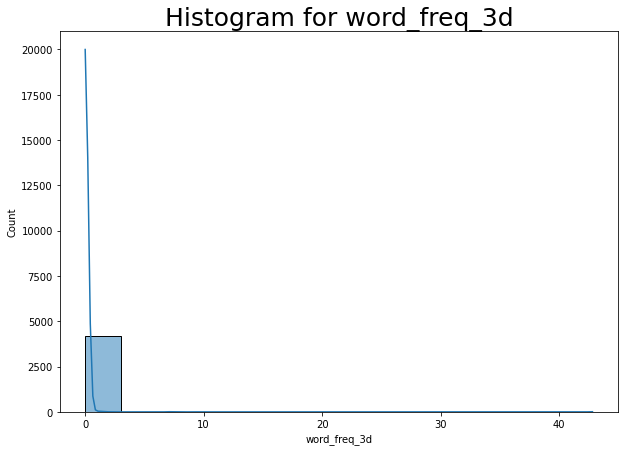

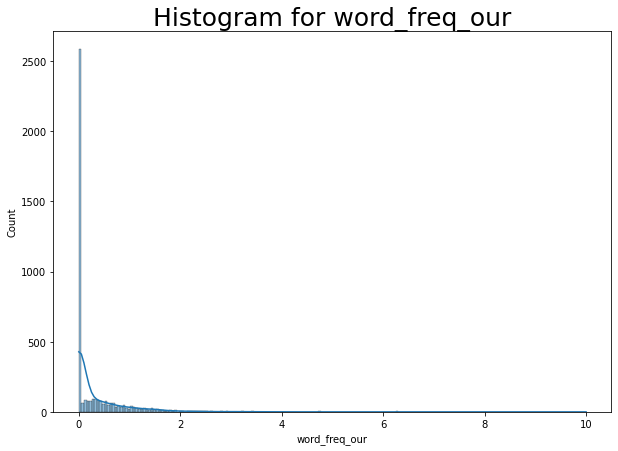

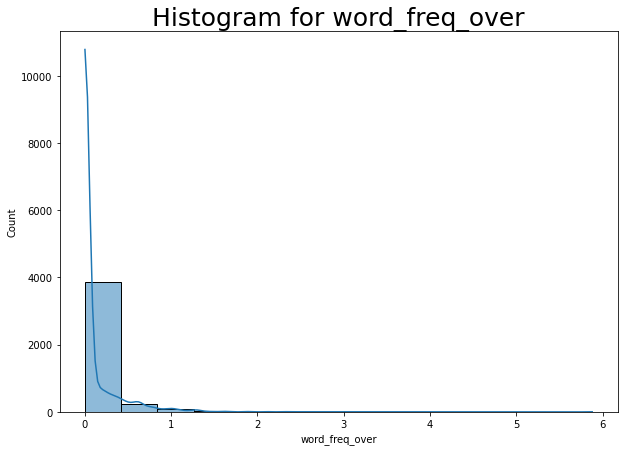

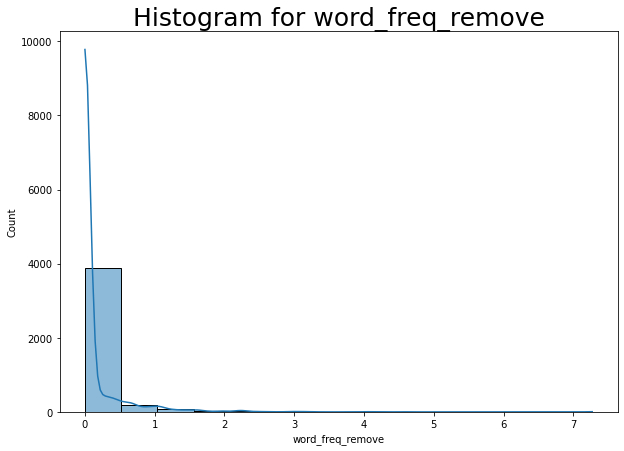

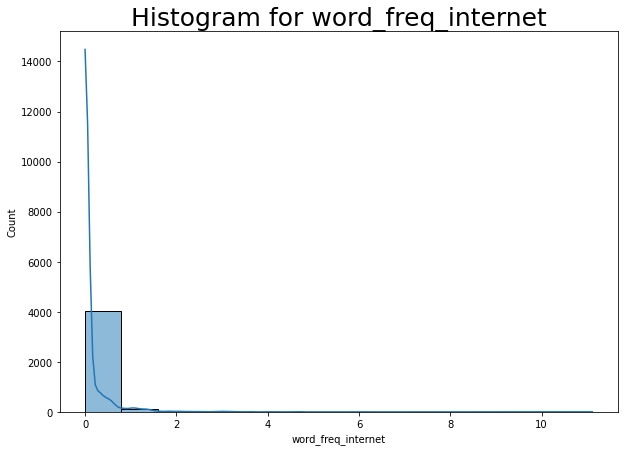

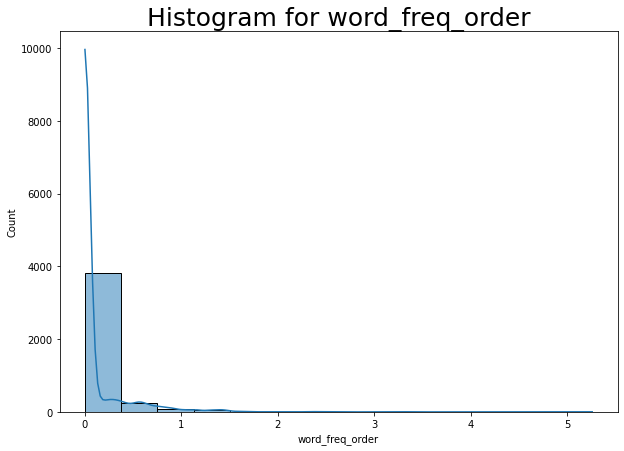

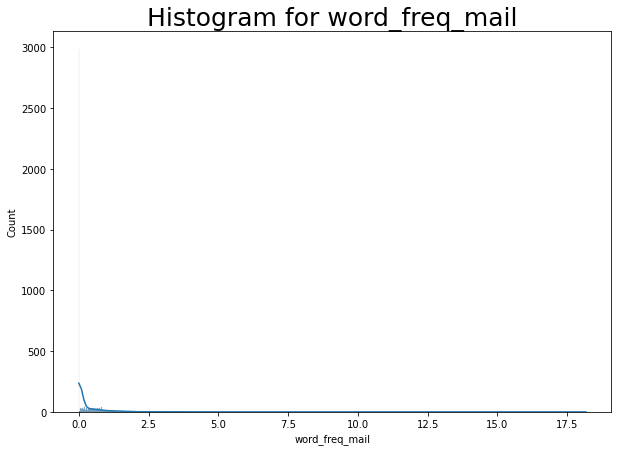

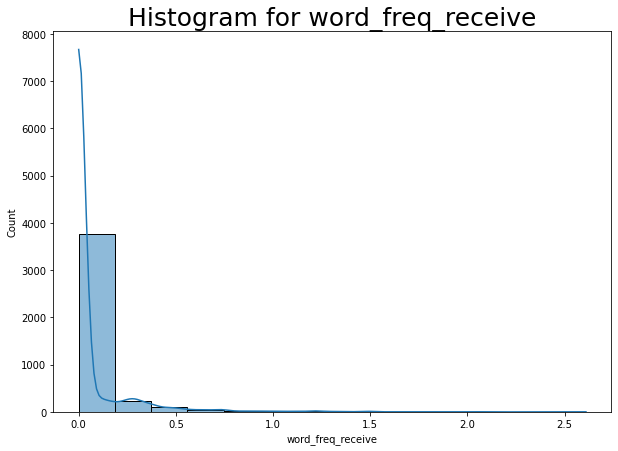

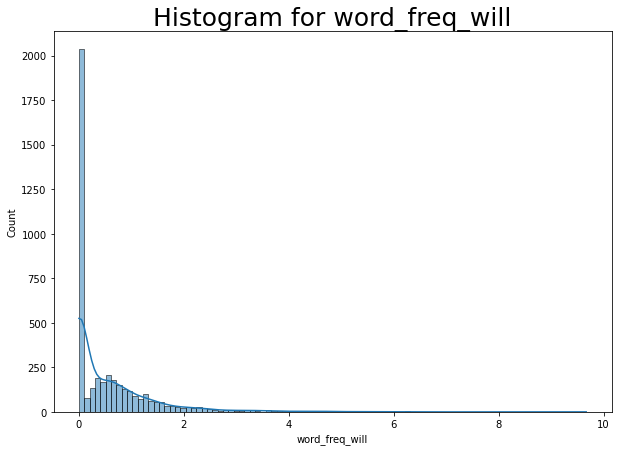

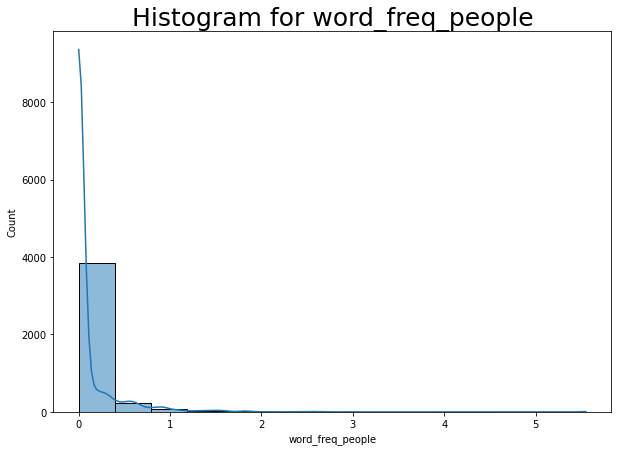

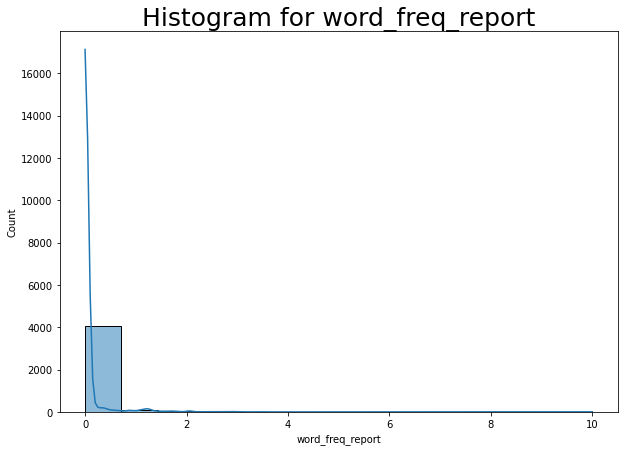

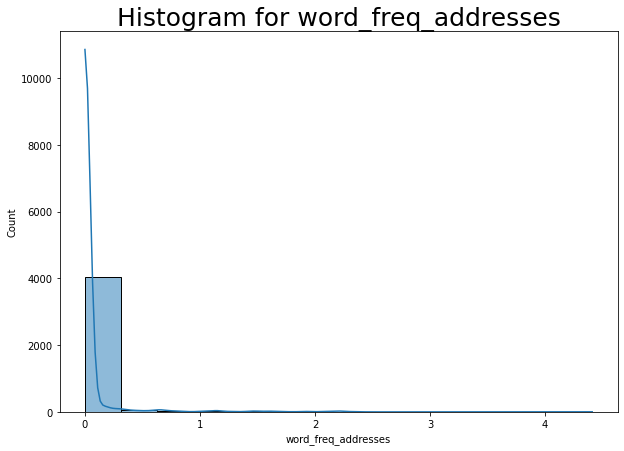

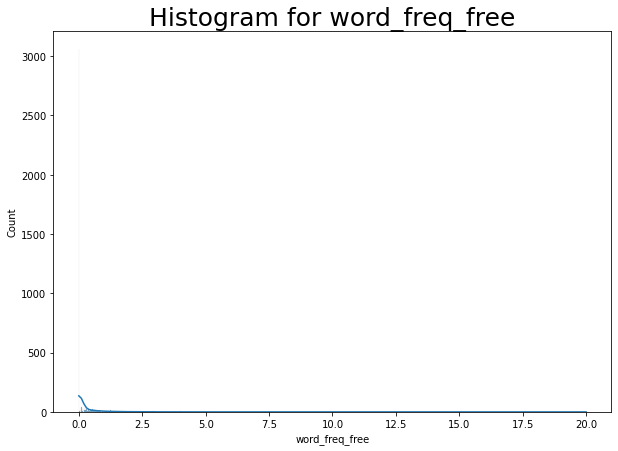

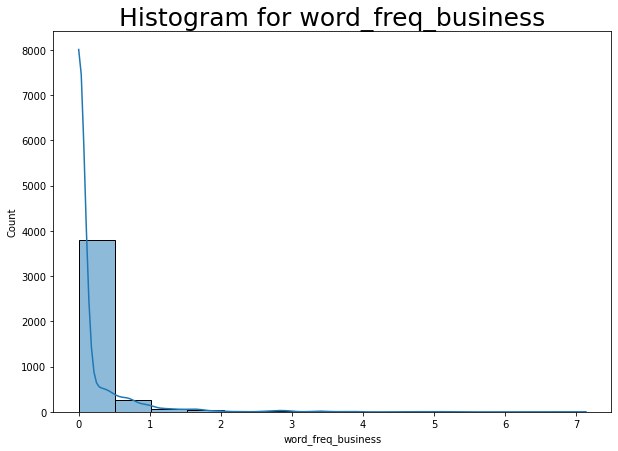

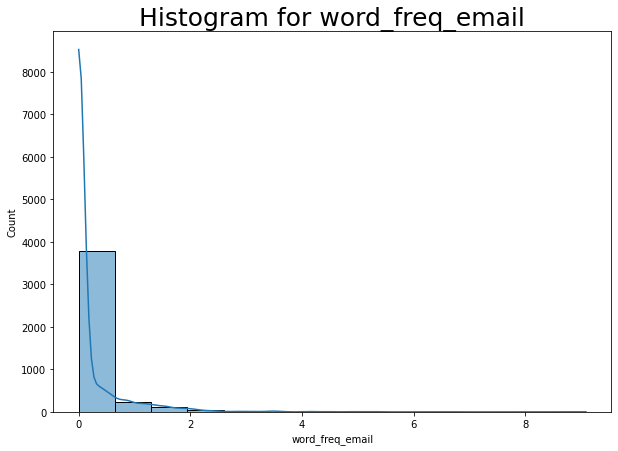

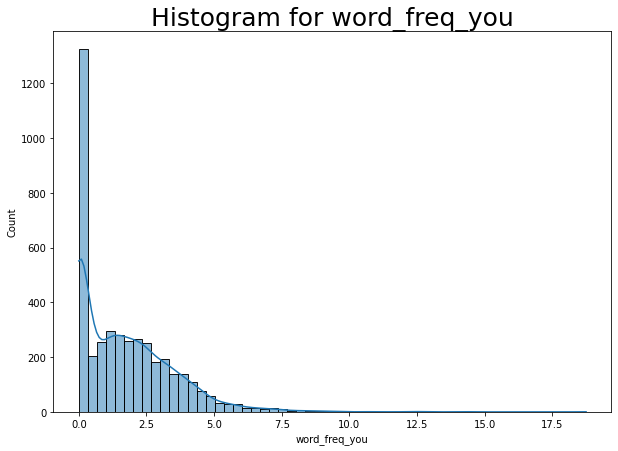

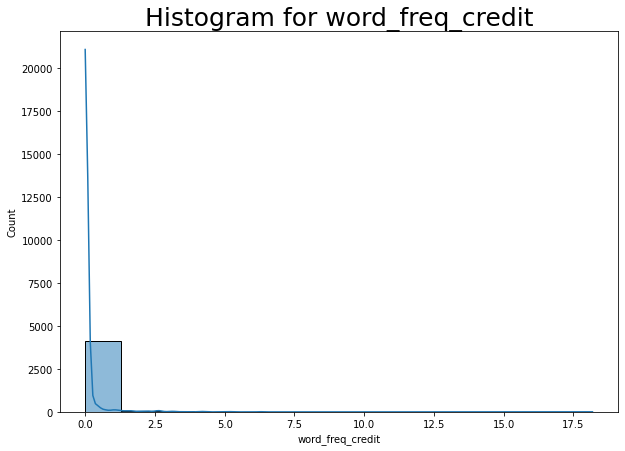

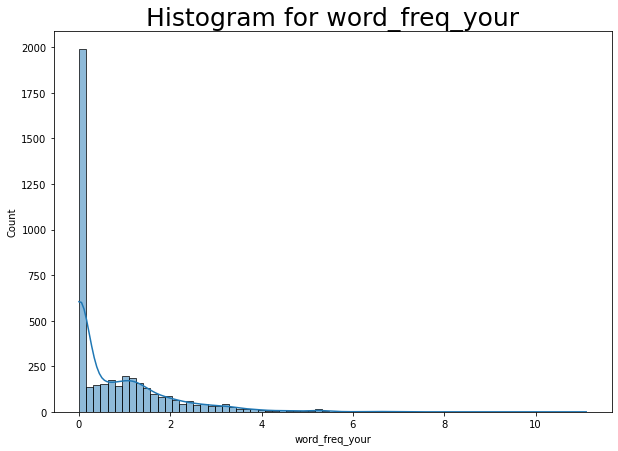

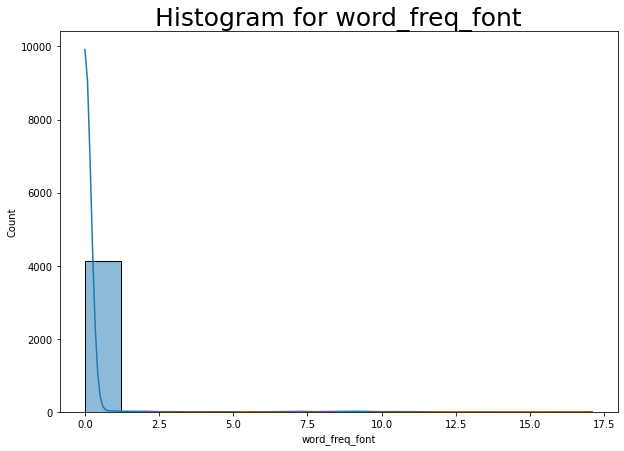

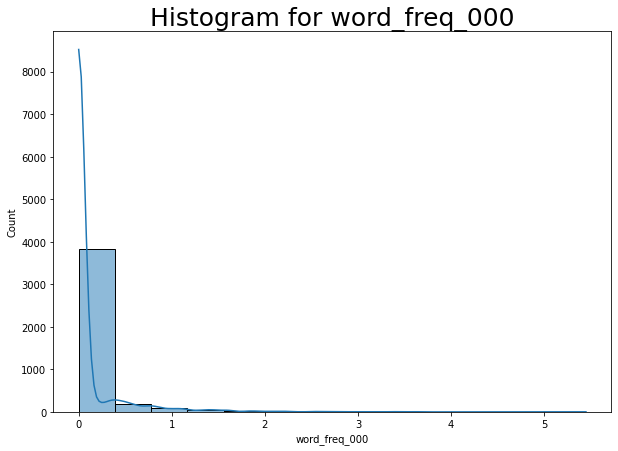

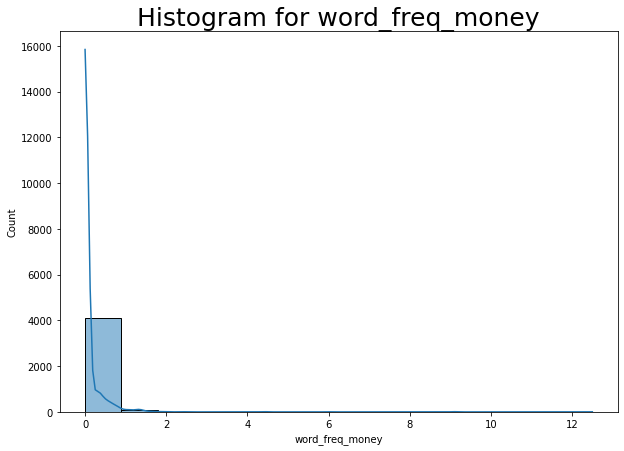

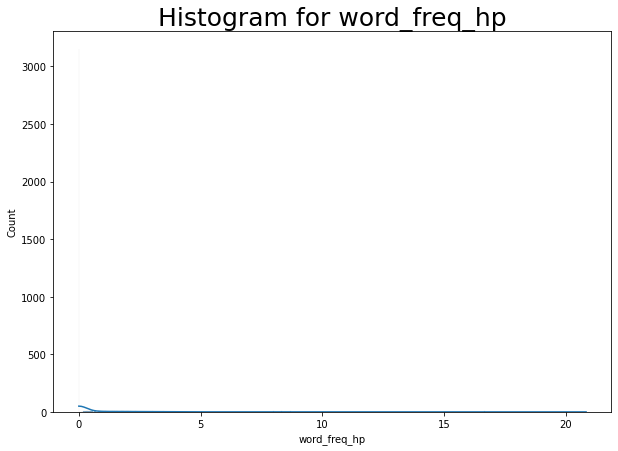

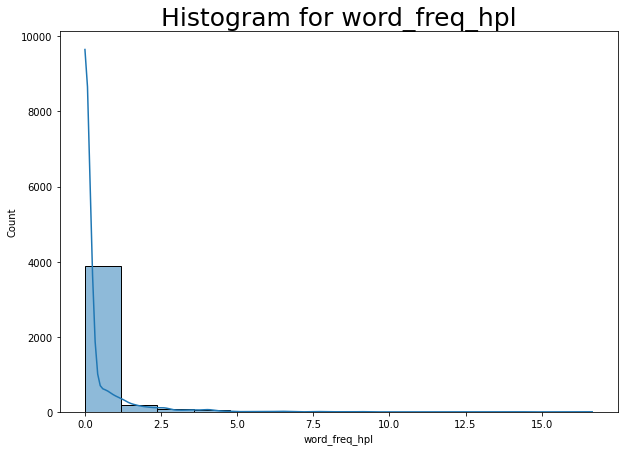

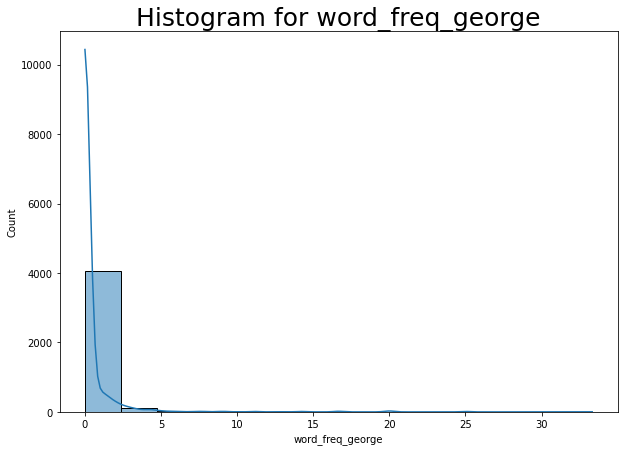

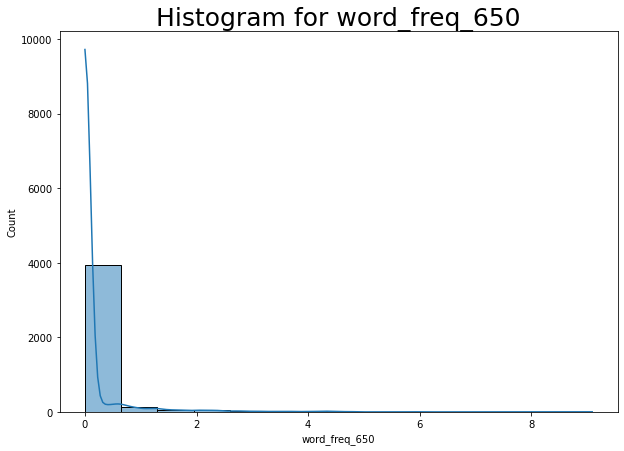

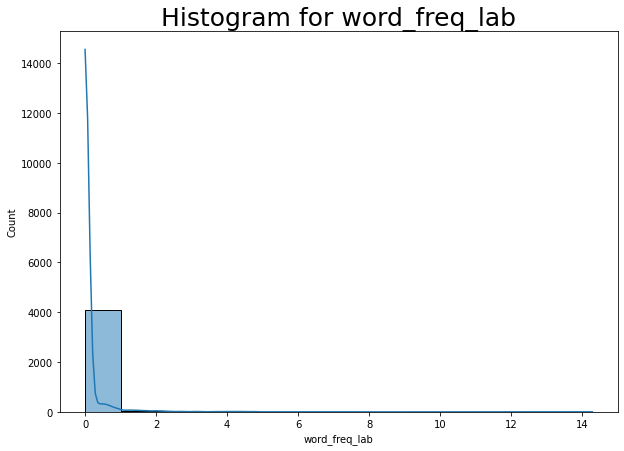

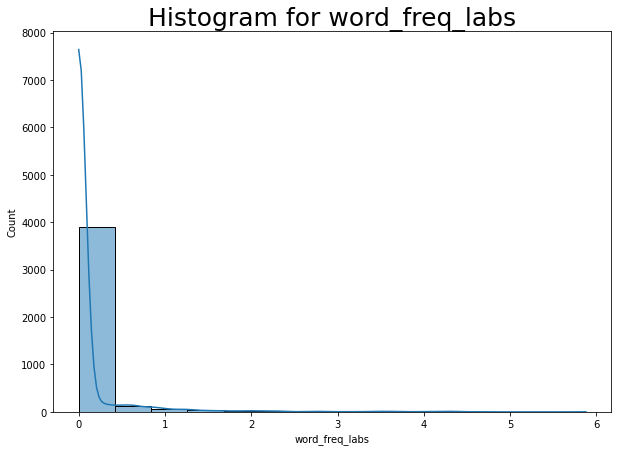

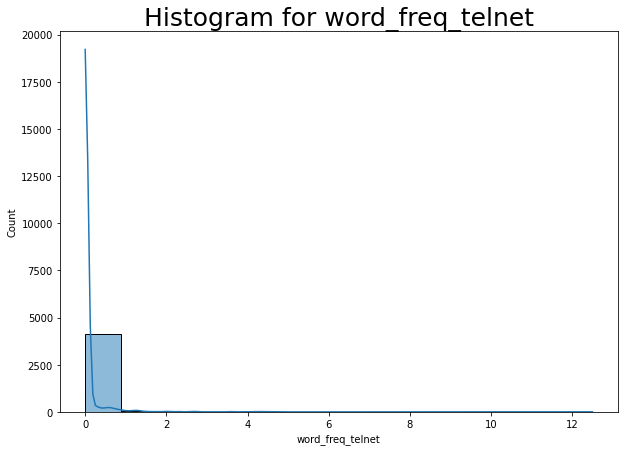

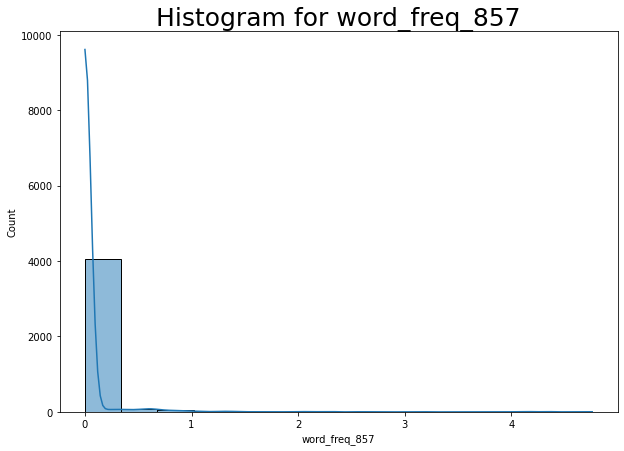

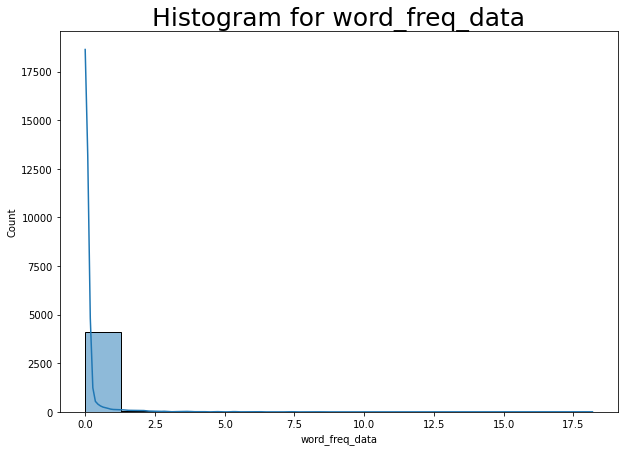

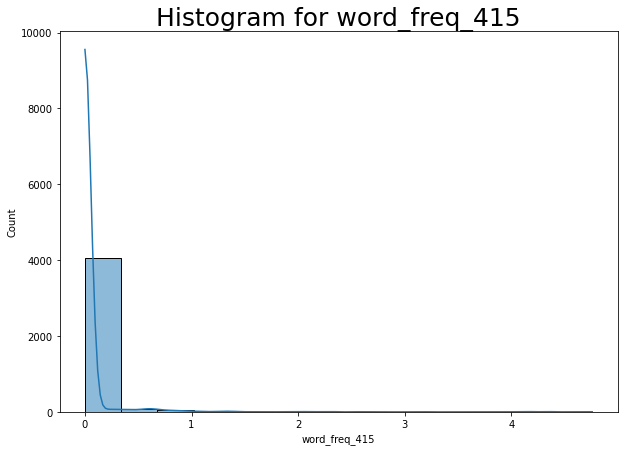

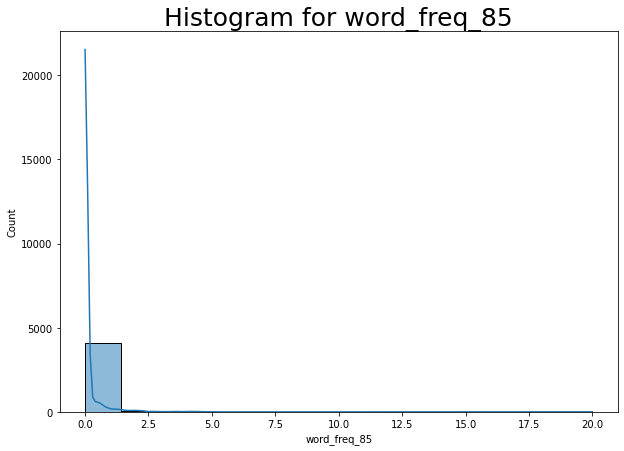

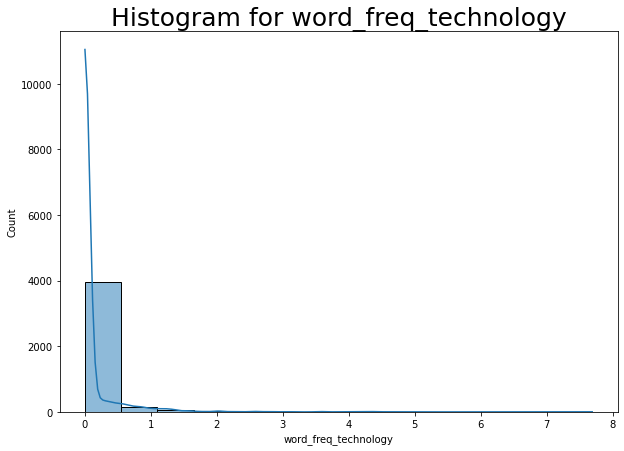

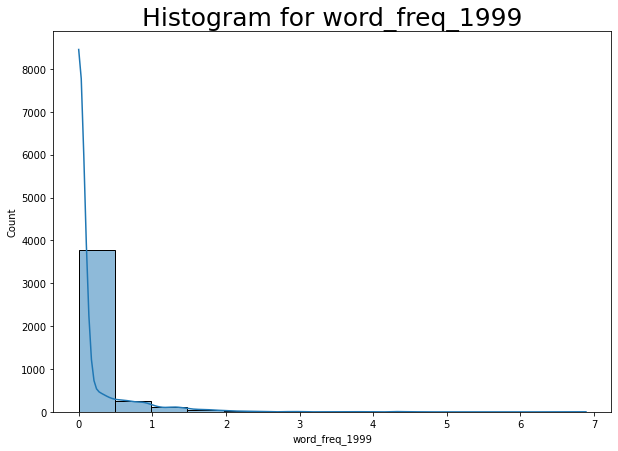

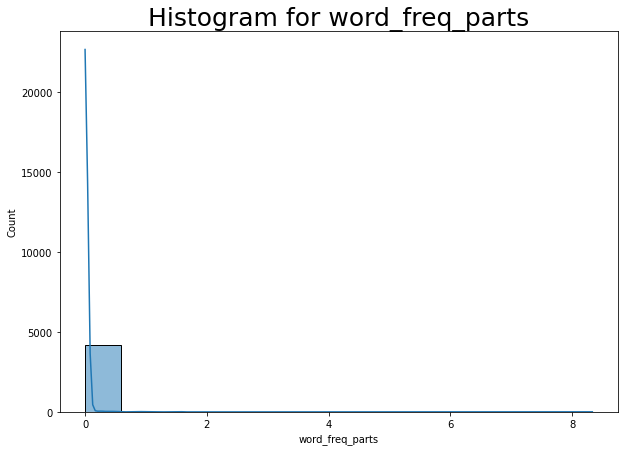

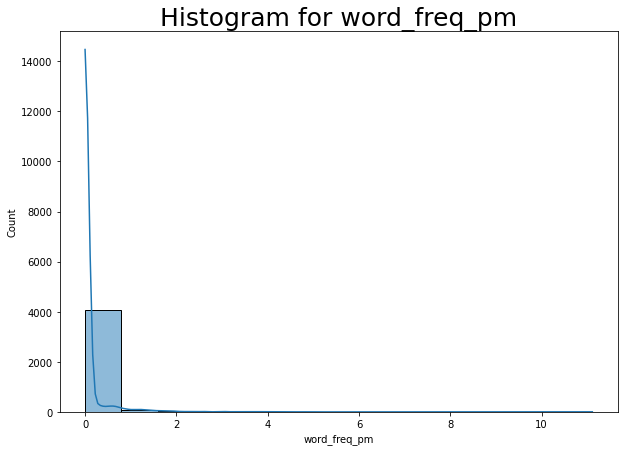

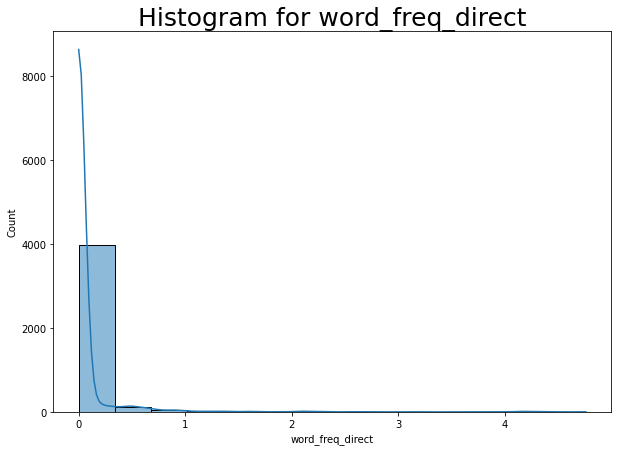

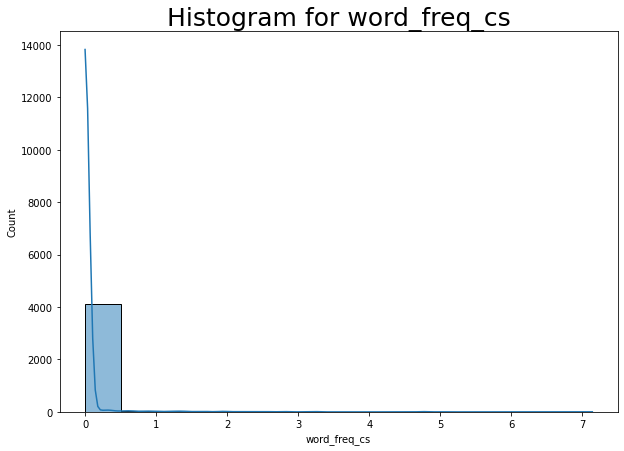

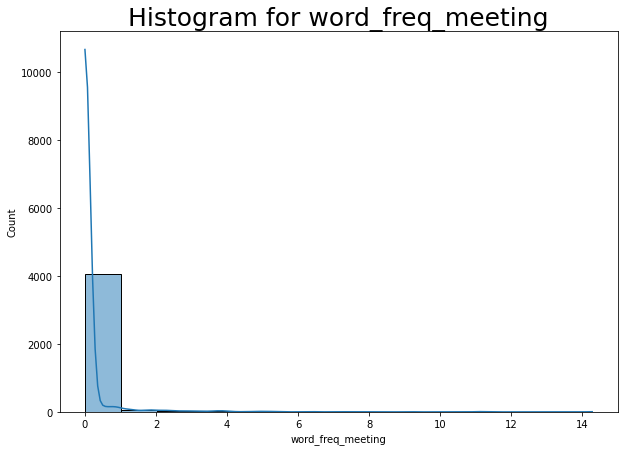

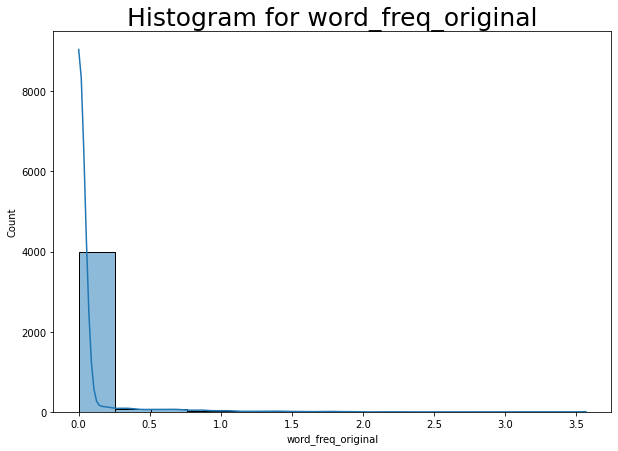

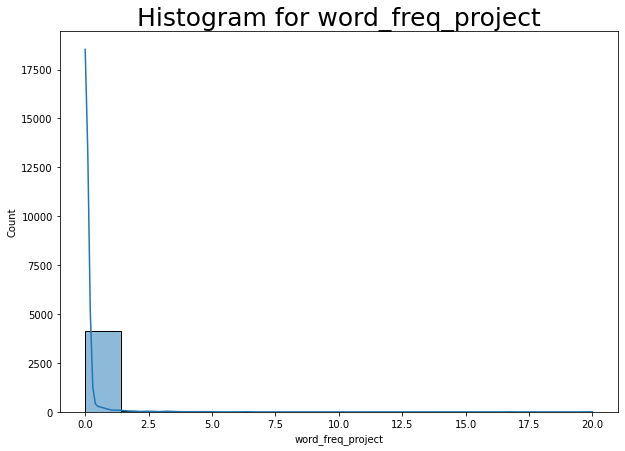

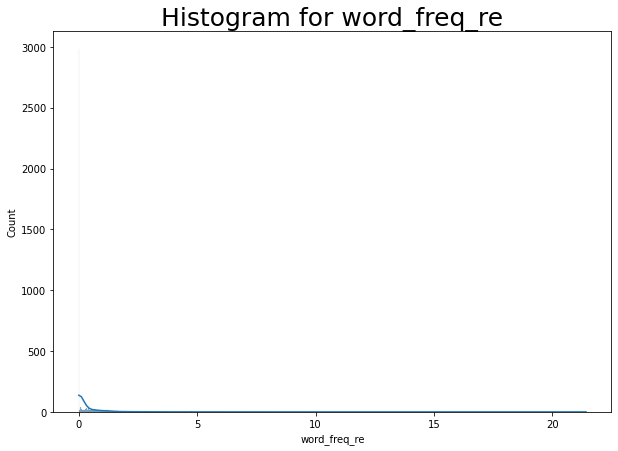

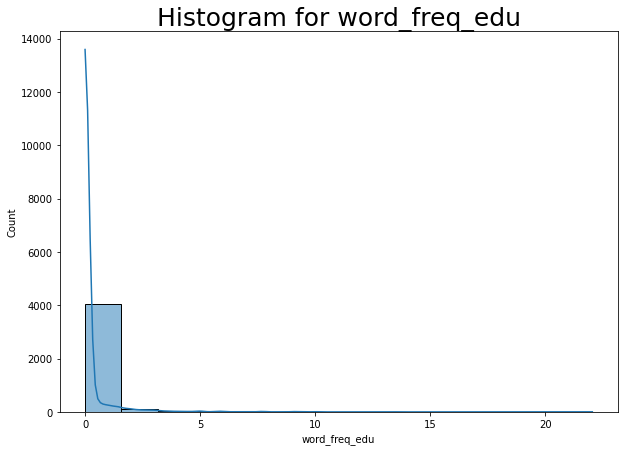

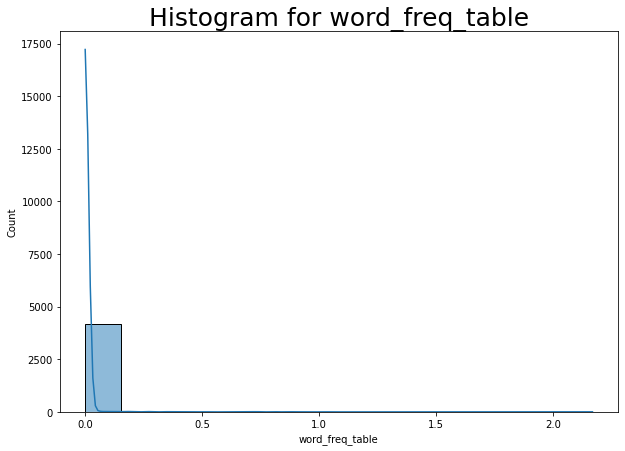

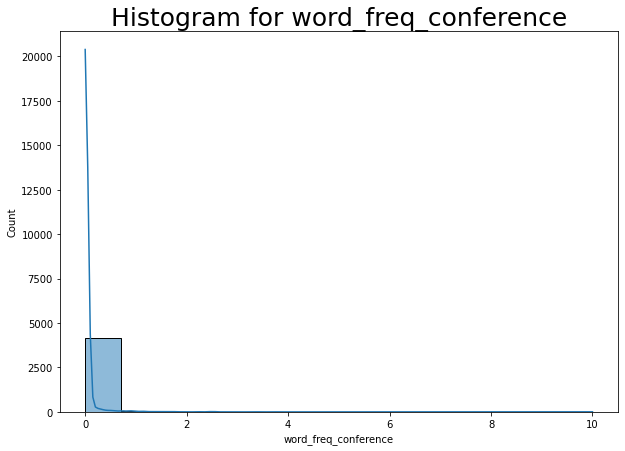

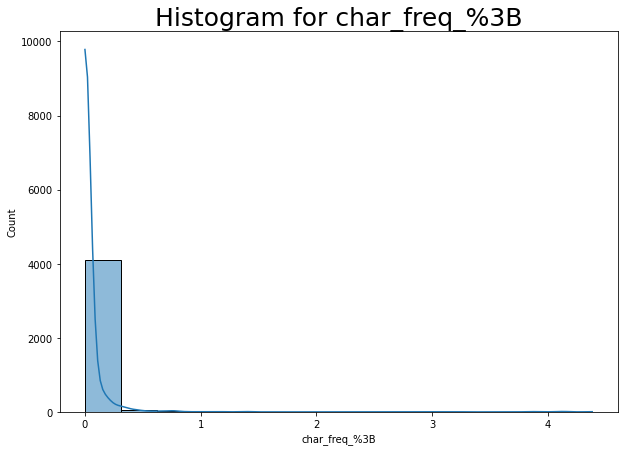

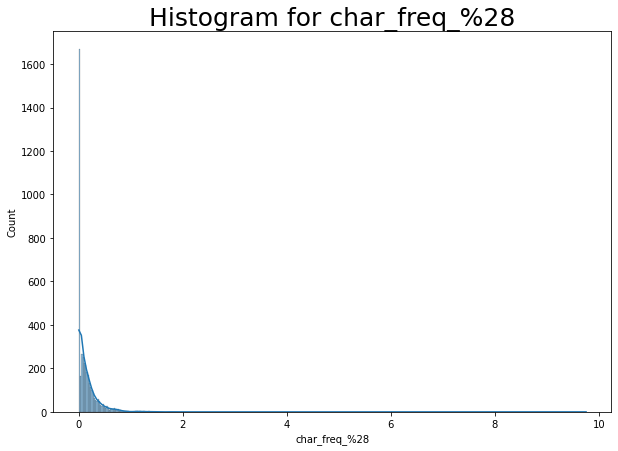

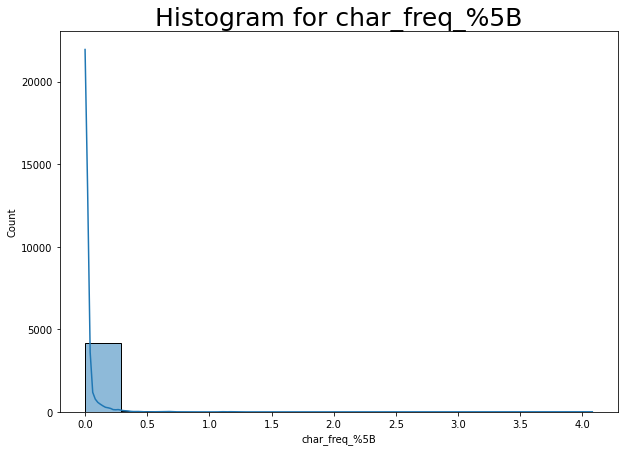

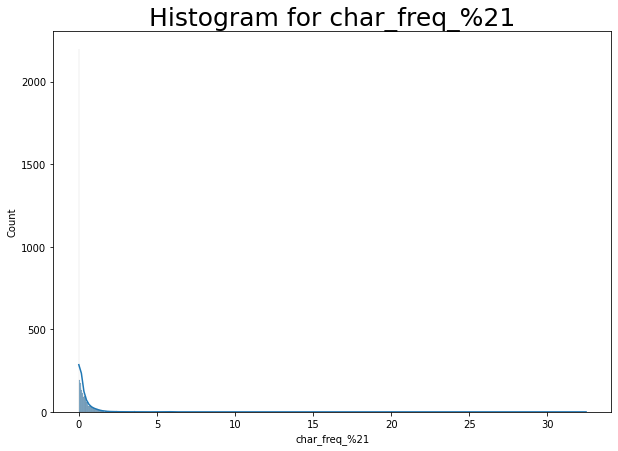

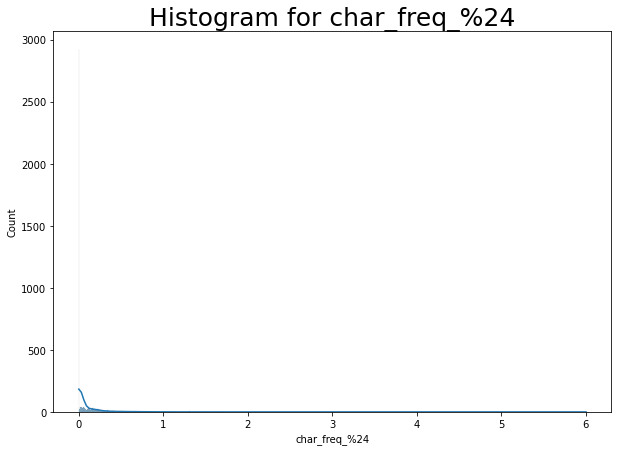

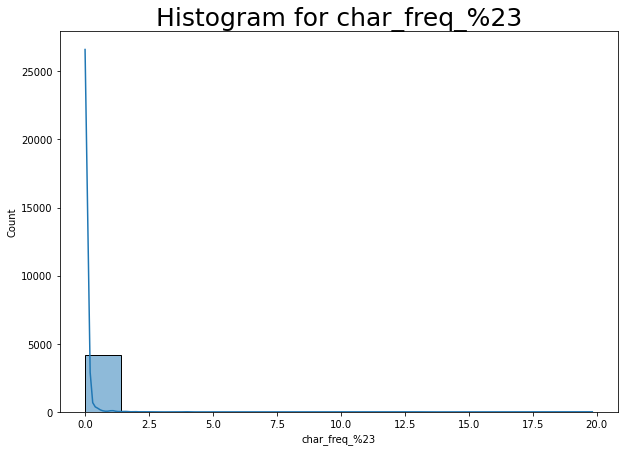

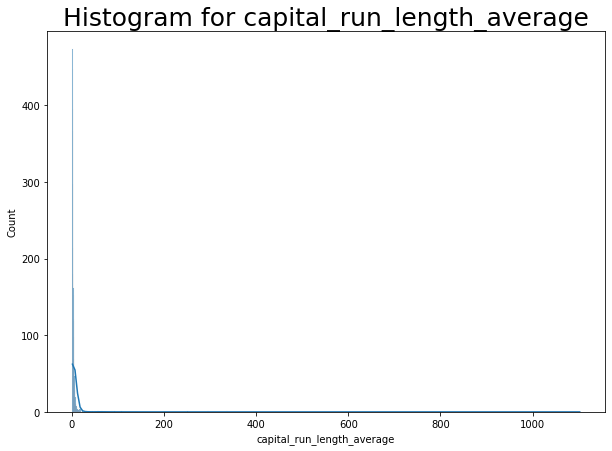

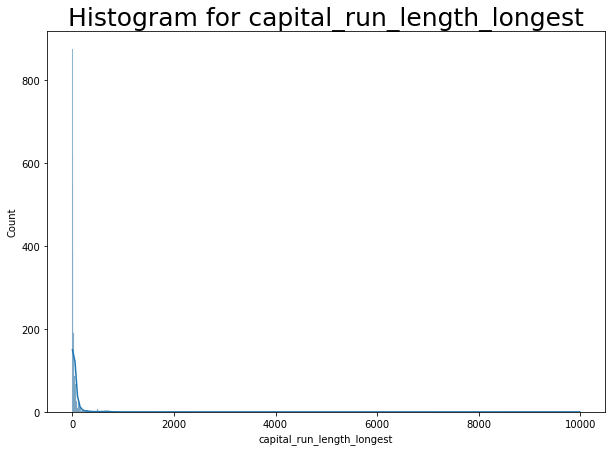

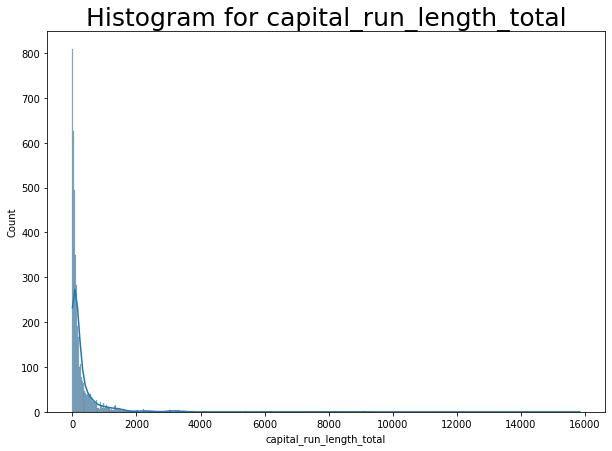

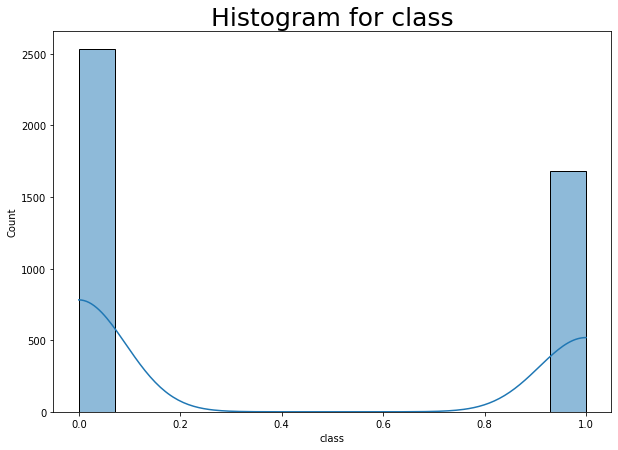

In [35]:
# Histograms of our dataframe
for i in file_names:
    plt.figure(figsize = (10,7))
    sns.histplot(spam[i], kde = True)
    plt.title('Histogram for ' + i, size = 25, color = 'black')
            
plt.show()

In [48]:
#loop to find mean of the columns
for i in file_names:
  print(i, 'mean:', spam[i].mean())

word_freq_make mean: 0.10436579572446555
word_freq_address mean: 0.11265558194774354
word_freq_all mean: 0.29147268408551075
word_freq_3d mean: 0.06307838479809978
word_freq_our mean: 0.32532066508313484
word_freq_over mean: 0.09665558194774354
word_freq_remove mean: 0.11747505938242277
word_freq_internet mean: 0.1079999999999999
word_freq_order mean: 0.09185985748218521
word_freq_mail mean: 0.24842042755344448
word_freq_receive mean: 0.05668646080760094
word_freq_will mean: 0.5652042755344422
word_freq_people mean: 0.09765558194774338
word_freq_report mean: 0.061211401425178134
word_freq_addresses mean: 0.04480285035629459
word_freq_free mean: 0.2538289786223281
word_freq_business mean: 0.14915439429928737
word_freq_email mean: 0.18875534441805233
word_freq_you mean: 1.718368171021377
word_freq_credit mean: 0.08496199524940615
word_freq_your mean: 0.8100403800475067
word_freq_font mean: 0.1315866983372922
word_freq_000 mean: 0.10062232779097398
word_freq_money mean: 0.0909691211401425

In [47]:
#loop to find mode of the columns
for i in file_names:
  print(i, 'mode:',spam[i].mode())

word_freq_make mode: 0    0.0
dtype: float64
word_freq_address mode: 0    0.0
dtype: float64
word_freq_all mode: 0    0.0
dtype: float64
word_freq_3d mode: 0    0.0
dtype: float64
word_freq_our mode: 0    0.0
dtype: float64
word_freq_over mode: 0    0.0
dtype: float64
word_freq_remove mode: 0    0.0
dtype: float64
word_freq_internet mode: 0    0.0
dtype: float64
word_freq_order mode: 0    0.0
dtype: float64
word_freq_mail mode: 0    0.0
dtype: float64
word_freq_receive mode: 0    0.0
dtype: float64
word_freq_will mode: 0    0.0
dtype: float64
word_freq_people mode: 0    0.0
dtype: float64
word_freq_report mode: 0    0.0
dtype: float64
word_freq_addresses mode: 0    0.0
dtype: float64
word_freq_free mode: 0    0.0
dtype: float64
word_freq_business mode: 0    0.0
dtype: float64
word_freq_email mode: 0    0.0
dtype: float64
word_freq_you mode: 0    0.0
dtype: float64
word_freq_credit mode: 0    0.0
dtype: float64
word_freq_your mode: 0    0.0
dtype: float64
word_freq_font mode: 0    0.0
d

In [46]:
#loop to find median of the columns
for i in file_names:
  print(i, 'median:',spam[i].median())


word_freq_make median: 0.0
word_freq_address median: 0.0
word_freq_all median: 0.0
word_freq_3d median: 0.0
word_freq_our median: 0.0
word_freq_over median: 0.0
word_freq_remove median: 0.0
word_freq_internet median: 0.0
word_freq_order median: 0.0
word_freq_mail median: 0.0
word_freq_receive median: 0.0
word_freq_will median: 0.19
word_freq_people median: 0.0
word_freq_report median: 0.0
word_freq_addresses median: 0.0
word_freq_free median: 0.0
word_freq_business median: 0.0
word_freq_email median: 0.0
word_freq_you median: 1.36
word_freq_credit median: 0.0
word_freq_your median: 0.29
word_freq_font median: 0.0
word_freq_000 median: 0.0
word_freq_money median: 0.0
word_freq_hp median: 0.0
word_freq_hpl median: 0.0
word_freq_george median: 0.0
word_freq_650 median: 0.0
word_freq_lab median: 0.0
word_freq_labs median: 0.0
word_freq_telnet median: 0.0
word_freq_857 median: 0.0
word_freq_data median: 0.0
word_freq_415 median: 0.0
word_freq_85 median: 0.0
word_freq_technology median: 0.0


In [45]:
#loop to find Standard Deviation of the columns
for i in file_names:
  print(i, 'Standard Deviation:',spam[i].std())

word_freq_make Standard Deviation: 0.3000048929174964
word_freq_address Standard Deviation: 0.45426003173290125
word_freq_all Standard Deviation: 0.5157185414620596
word_freq_3d Standard Deviation: 1.3524868029603305
word_freq_our Standard Deviation: 0.6878051934276233
word_freq_over Standard Deviation: 0.27603026758474924
word_freq_remove Standard Deviation: 0.3972836790800548
word_freq_internet Standard Deviation: 0.41028241581502206
word_freq_order Standard Deviation: 0.2821437877526897
word_freq_mail Standard Deviation: 0.6566384866307784
word_freq_receive Standard Deviation: 0.18416660423521333
word_freq_will Standard Deviation: 0.882513052746947
word_freq_people Standard Deviation: 0.3093093343836602
word_freq_report Standard Deviation: 0.34606570000859804
word_freq_addresses Standard Deviation: 0.24218597730699262
word_freq_free Standard Deviation: 0.7975344634859286
word_freq_business Standard Deviation: 0.4576690530712612
word_freq_email Standard Deviation: 0.5411333455781163


In [44]:
##loop to find Variance of the columns
for i in file_names:
  print(i, 'Variance:',spam[i].var())


word_freq_make Variance: 0.09000293577443848
word_freq_address Variance: 0.20635217642997647
word_freq_all Variance: 0.26596561400775415
word_freq_3d Variance: 1.8292205521818556
word_freq_our Variance: 0.4730759841060102
word_freq_over Variance: 0.07619270862290826
word_freq_remove Variance: 0.157834321663384
word_freq_internet Variance: 0.16833166072701067
word_freq_order Variance: 0.07960511696743483
word_freq_mail Variance: 0.431174102124759
word_freq_receive Variance: 0.0339173381155297
word_freq_will Variance: 0.7788292882687357
word_freq_people Variance: 0.09567226433686292
word_freq_report Variance: 0.11976146872244099
word_freq_addresses Variance: 0.05865404760414314
word_freq_free Variance: 0.636061220447788
word_freq_business Variance: 0.2094609621391449
word_freq_email Variance: 0.29282529769656507
word_freq_you Variance: 3.1285116391861987
word_freq_credit Variance: 0.2556139329815678
word_freq_your Variance: 1.3210102858482384
word_freq_font Variance: 1.1475943931707298
w

In [43]:
#loop to find skewness of the columns
for i in file_names:
  print(i, 'Skewness:',spam[i].skew())

word_freq_make Skewness: 5.869855242999023
word_freq_address Skewness: 13.464663617099461
word_freq_all Skewness: 2.980622758226944
word_freq_3d Skewness: 27.209539135206047
word_freq_our Skewness: 4.696945655413882
word_freq_over Skewness: 6.122652991477142
word_freq_remove Skewness: 6.808707185718419
word_freq_internet Skewness: 9.73423186777421
word_freq_order Skewness: 5.284306039509901
word_freq_mail Skewness: 8.568578629504533
word_freq_receive Skewness: 5.078280750649965
word_freq_will Skewness: 2.8280046744251446
word_freq_people Skewness: 6.8899516279506825
word_freq_report Skewness: 11.564141699105374
word_freq_addresses Skewness: 7.513375396484275
word_freq_free Skewness: 9.38774512258617
word_freq_business Skewness: 5.567668427951165
word_freq_email Skewness: 5.453866818258588
word_freq_you Skewness: 1.524250830043939
word_freq_credit Skewness: 15.43017441535798
word_freq_your Skewness: 2.245706812455323
word_freq_font Skewness: 9.541533340465548
word_freq_000 Skewness: 5.8

In [42]:
#loop to find kurtosis of the columns
for i in file_names:
  print(i, 'Kurtosis:',spam[i].kurt())

word_freq_make Kurtosis: 54.35140555393713
word_freq_address Kurtosis: 306.6859733110557
word_freq_all Kurtosis: 12.941446887016067
word_freq_3d Kurtosis: 788.3700579065502
word_freq_our Kurtosis: 37.06480080166446
word_freq_over Kurtosis: 71.60326696371024
word_freq_remove Kurtosis: 76.38164731817447
word_freq_internet Kurtosis: 167.55021940338852
word_freq_order Kurtosis: 48.011373485980215
word_freq_mail Kurtosis: 162.53903333498258
word_freq_receive Kurtosis: 34.65611931939017
word_freq_will Kurtosis: 12.096068302538724
word_freq_people Kurtosis: 82.59629686440552
word_freq_report Kurtosis: 219.64515484234872
word_freq_addresses Kurtosis: 69.49380879410651
word_freq_free Kurtosis: 157.6917415736734
word_freq_business Kurtosis: 43.514184372410874
word_freq_email Kurtosis: 48.1574607557439
word_freq_you Kurtosis: 4.998065927313517
word_freq_credit Kurtosis: 424.6857707931336
word_freq_your Kurtosis: 8.094203440871675
word_freq_font Kurtosis: 99.66608929657035
word_freq_000 Kurtosis: 

# **Bivariate Analysis**

# **Multivariate Analysis**

In [77]:
#viewing how the variables correlate
spam.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0

In [78]:
#chcking the VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(spam.values,i) for i in range(spam.shape[1])]
vif["Features"] = spam.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,vif,Features
0,1.229441,word_freq_make
1,1.174008,word_freq_address
2,1.412381,word_freq_all
3,1.010549,word_freq_3d
4,1.376019,word_freq_our
5,1.210074,word_freq_over
6,1.298437,word_freq_remove
7,1.191483,word_freq_internet
8,1.320173,word_freq_order
9,1.276461,word_freq_mail


# **Modelling**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

## **80-20 split**

In [50]:
X = spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']].values
y= spam[['class']].values
# split our data into 80% train , 20% test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0 )

In [55]:
# Normalizing the data
normalizer = preprocessing.Normalizer()
# Create normalizer
normalizer = preprocessing.Normalizer(norm='l2')
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [56]:
# Training the model
gnb = GaussianNB()  
naive1 = gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
# Make predictions
y_pred = gnb.predict(X_test)
# Evaluation
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[318 177]
 [ 11 336]]
Accuracy: 0.7767220902612827


Gaussian Naive Bayes had a 77% accuracy score, on the 80/20 split

In [62]:
# Multinomial
mnb = MultinomialNB()
mmnb = mnb.fit(X_train, y_train)
# Make prediction
y_pred_mnb = mnb.predict(X_test)
# Evaluation
print(confusion_matrix(y_test, y_pred_mnb))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mnb))

[[495   0]
 [345   2]]
Accuracy: 0.5902612826603325


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naive Bayes had a 59% accuracy score, on the 80/20 split

In [63]:
# Bernoulli
bn = BernoulliNB()
mbn = bn.fit(X_train, y_train)
# Make prediction
y_pred_bn = bn.predict(X_test)
# Evaluation 
print(confusion_matrix(y_test, y_pred_bn))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bn))

[[457  38]
 [ 54 293]]
Accuracy: 0.8907363420427553


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bernoulli Naive Bayes had a 89% accuracy score, on the 80/20 split, performing the better of all three

# **70-30 Split**

In [64]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=0)

In [65]:
# Normalizing the data
X_train1 = normalizer.fit_transform(X_train1)
X_test1 = normalizer.transform(X_test1)

In [66]:
# Training the model
naive2 = gnb.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
# Make predictions
y_pred1 = gnb.predict(X_test1)
# Evaluation
print(confusion_matrix(y_test1, y_pred1))
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

[[476 261]
 [ 12 514]]
Accuracy: 0.7838479809976246


Gaussian Naive Bayes had a 78% accuracy score, on the 70/30 split

In [68]:
# Multinomial
mmnb = mnb.fit(X_train1, y_train1)
# Make prediction
y_pred_mnb1 = mnb.predict(X_test1)
# Evaluation
print(confusion_matrix(y_test1, y_pred_mnb1))
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_mnb1))

[[734   3]
 [524   2]]
Accuracy: 0.5827395091053048


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naive Bayes had a 58% accuracy score, on the 70/30 split

In [69]:
# Bernoulli
mbn = bn.fit(X_train1, y_train1)
# Make prediction
y_pred_bn1 = bn.predict(X_test1)
# Evaluation 
print(confusion_matrix(y_test1, y_pred_bn1))
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_bn1))

[[685  52]
 [ 76 450]]
Accuracy: 0.8986539984164688


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bernoulli Naive Bayes had a 89% accuracy score, on the 70/30 split

## **60-40 Split**

In [70]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.40, random_state=0)

In [71]:
# Normalizing the data
normalizer = preprocessing.Normalizer()
# Create normalizer
normalizer = preprocessing.Normalizer(norm='l2')
X_train2 = normalizer.fit_transform(X_train2)
X_test2 = normalizer.transform(X_test2)

In [72]:
# Training the model
gnb = GaussianNB()  
naive2 = gnb.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
# Make predictions
y_pred2 = gnb.predict(X_test2)
# Evaluation
print(confusion_matrix(y_test2, y_pred2))
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

[[663 331]
 [ 20 670]]
Accuracy: 0.7915676959619953


Gaussian Naive Bayes had a 79% accuracy score, on the 60/40 split

In [75]:
# Multinomial
mnb = MultinomialNB()
mmnb = mnb.fit(X_train2, y_train2)
# Make prediction
y_pred_mnb2 = mnb.predict(X_test2)
# Evaluation
print(confusion_matrix(y_test2, y_pred_mnb2))
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_mnb2))

[[991   3]
 [688   2]]
Accuracy: 0.5896674584323041


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naive Bayes had a 58% accuracy score, on the 60/40 split

In [76]:
# Bernoulli
bn = BernoulliNB()
mbn = bn.fit(X_train2, y_train2)
# Make prediction
y_pred_bn2 = bn.predict(X_test2)
# Evaluation 
print(confusion_matrix(y_test2, y_pred_bn2))
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_bn2))

[[927  67]
 [ 98 592]]
Accuracy: 0.9020190023752969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bernoulli Naive Bayes had a 90% accuracy score, on the 60/40 split

# **Conclusion**
The best performing split was 60-40 at 90% accuracy


The Naive BayesVariations Performed in the following order:
Bernoulli, Gaussian, Multinomial


# **Recommendation**


Using the Bernoulli Naive Bayes algorithm at a test size of 0.40 yields a 90% accuracy, which is close to the level placed in our metric of success